#Predicción de MIX PREMIUM de Naftas teniendo como base la predicción de nafta total

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error,  make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from timeit import default_timer as timer
import warnings

In [ ]:
ruta_archivo = '/content/resumen 1989-2023.xls'
#hoja especfica
nombre_hoja_super = 'Comparativa NS'
nombre_hoja_premium ='Comparativa NP'
hojamix='Comparativa MIX'
# Lee la hoja específica del archivo Excel
datos_nafta_super = pd.read_excel(ruta_archivo, sheet_name=nombre_hoja_super)
datos_nafta_premium=pd.read_excel(ruta_archivo, sheet_name=nombre_hoja_premium)
datos_mix=pd.read_excel(ruta_archivo, sheet_name=hojamix)

In [ ]:
datos_nafta_super.head(5)

,Año,Total km3,Inflación,Precio promedio x barill USD OPEP,PBI USD
0,1989,2762.953,30.7981,17.31,7.662966e+10
1,1990,2717.260,23.1396,22.26,1.413527e+11
2,1991,3274.682,1.7167,18.62,1.897200e+11
3,1992,3881.815,0.2490,18.44,2.287789e+11
4,1993,4269.307,0.1061,16.33,2.367417e+11


In [ ]:
datos_nafta_premium.head()

,Año,Total km3,Inflación,Precio promedio x barill USD OPEP,PBI USD,Mix premium
0,1999,90.476000,-0.0117,17.44,2.835230e+11,0.017051
1,2000,428.497000,-0.0094,27.60,2.842038e+11,0.083187
2,2001,649.073998,-0.0107,23.12,2.686968e+11,0.152871
3,2002,435.997500,0.2587,24.36,9.772400e+10,0.116875
4,2003,521.317030,0.1344,28.10,1.275870e+11,0.154198


In [ ]:
datos_mix.head()

,Año,Total km3,Inflación,Precio promedio x barill USD OPEP,PBI USD,Mix premium,Indice de CVS,Delta años,CVS vs Infl
0,1999,5306.289800,-0.0117,17.44,2.835230e+11,0.017051,0.000000,0.000000,0.000000
1,2000,5151.031000,-0.0094,27.60,2.842038e+11,0.083187,0.000000,0.000000,0.000000
2,2001,4245.892645,-0.0107,23.12,2.686968e+11,0.152871,5.440108,0.000000,0.000000
3,2002,3730.453860,0.2587,24.36,9.772400e+10,0.116875,5.477271,0.006831,-0.251869
4,2003,3380.834938,0.1344,28.10,1.275870e+11,0.154198,6.361908,0.161511,0.027111


In [ ]:
datos_nafta_super['Inflación']=datos_nafta_super['Inflación']*100
datos_nafta_premium['Inflación']=datos_nafta_premium['Inflación']*100
datos_nafta_premium['Mix premium']=datos_nafta_premium['Mix premium']*100
datos_mix['Inflación']=datos_mix['Inflación']*100
datos_mix['Mix premium']=datos_mix['Mix premium']*100

In [ ]:
datos_nafta_super.set_index('Año',inplace=True)
datos_nafta_premium.set_index('Año', inplace=True)
datos_mix.set_index('Año',inplace=True)

Desestimamos el año 2020 debido a que distorsiona el analisis

In [ ]:
datos_nafta_super = datos_nafta_super.drop(2020, axis=0)
datos_nafta_premium = datos_nafta_premium.drop(2020, axis=0)
datos_mix = datos_mix.drop(2020, axis=0)

In [ ]:
datos_mix['Mix premium'] = datos_mix['Mix premium'].round(2)
print(datos_mix['Mix premium'])

Año
1999     1.71
2000     8.32
2001    15.29
2002    11.69
2003    15.42
2004    20.17
2005    25.01
2006    30.89
2007    31.37
2008    23.40
2009    18.31
2010    20.23
2011    24.87
2012    24.35
2013    23.93
2014    23.42
2015    27.57
2016    28.07
2017    31.13
2018    28.56
2019    25.01
2021    26.95
2022    28.25
2023    27.13
Name: Mix premium, dtype: float64


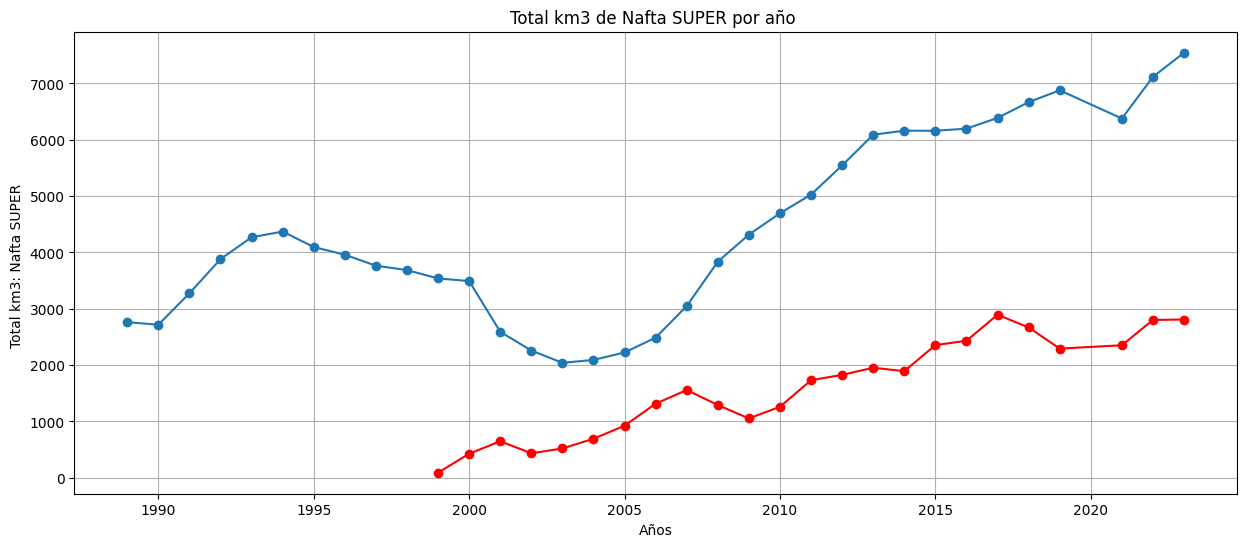

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(datos_nafta_super.index, datos_nafta_super['Total km3'], marker='o', linestyle='-')
plt.plot(datos_nafta_premium.index, datos_nafta_premium['Total km3'],marker='o',linestyle='-',color='r')
plt.xlabel('Años')
plt.ylabel('Total km3: Nafta SUPER ')
plt.title('Total km3 de Nafta SUPER por año ')
plt.grid(True)
plt.show()

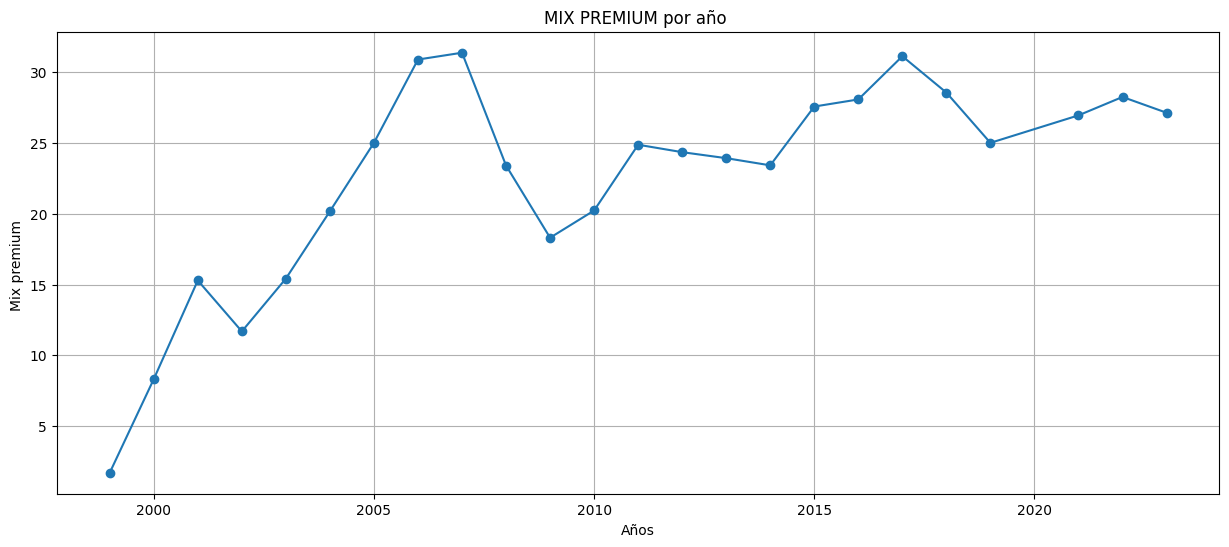

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(datos_nafta_premium.index, datos_nafta_premium['Mix premium'], marker='o', linestyle='-')
plt.xlabel('Años')
plt.ylabel('Mix premium ')
plt.title('MIX PREMIUM por año ')

plt.grid(True)
plt.show()

warnings.filterwarnings("ignore")

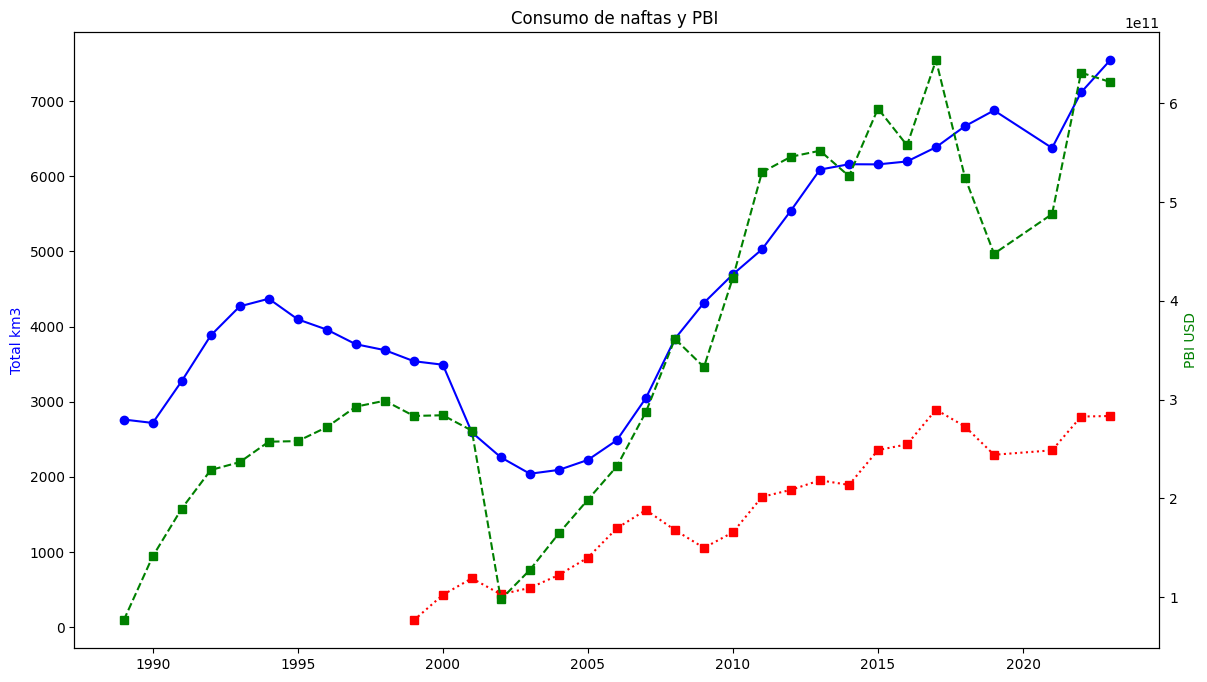

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))
#  total de km³ consumidos en el primer eje y
ax1.plot(datos_nafta_super.index, datos_nafta_super['Total km3'], color='b', marker='o', linestyle='-')
ax1.set_ylabel('Total km3', color='b')
ax1.plot(datos_nafta_premium.index,datos_nafta_premium['Total km3'], color ='r', marker='s',linestyle=':')
# segundo eje y para el pbi
ax2 = ax1.twinx()
ax2.plot(datos_nafta_super.index, datos_nafta_super['PBI USD'], color='g', marker='s', linestyle='--')
ax2.set_ylabel('PBI USD', color='g')

# Etiquetas y título
plt.xlabel('Años')
plt.title('Consumo de naftas y PBI ')

plt.show()

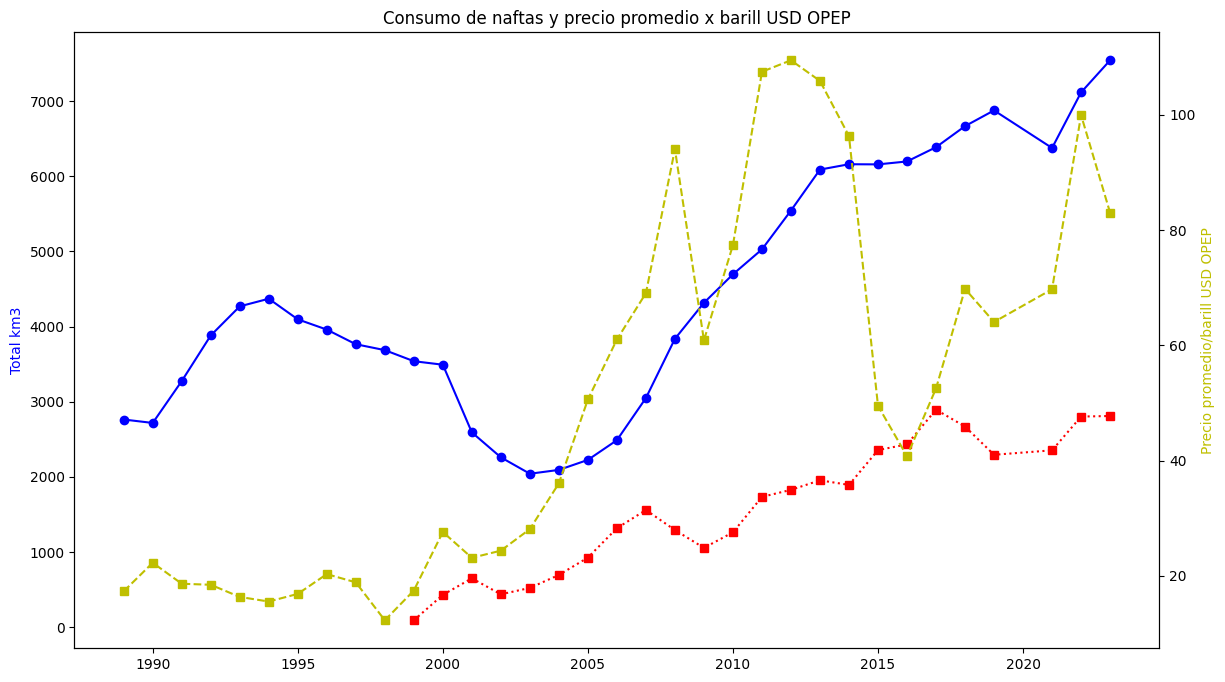

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8))

#  total de km³ consumidos en el primer eje y
ax1.plot(datos_nafta_super.index, datos_nafta_super['Total km3'], color='b', marker='o', linestyle='-')
ax1.set_ylabel('Total km3', color='b')
ax1.plot(datos_nafta_premium.index,datos_nafta_premium['Total km3'], color ='r', marker='s',linestyle=':')

# segundo eje y para el precio promedio x barril
ax2 = ax1.twinx()
ax2.plot(datos_nafta_super.index, datos_nafta_super['Precio promedio x barill USD OPEP'], color='y', marker='s', linestyle='--')
ax2.set_ylabel('Precio promedio/barill USD OPEP', color='y')

# Etiquetas y título
plt.xlabel('Años')
plt.title('Consumo de naftas y precio promedio x barill USD OPEP')

plt.show()

###Correlación entre variables

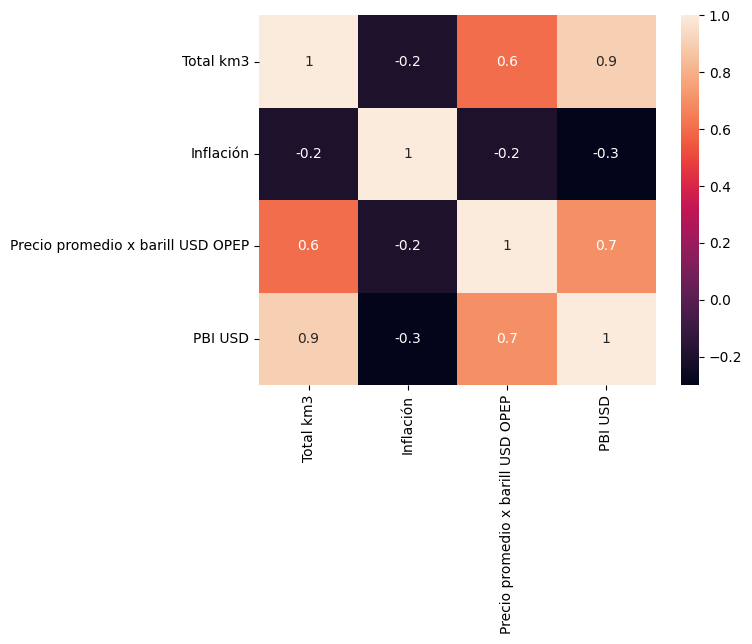

In [ ]:
matriz_correlacion= datos_nafta_super.corr().round(1)
sns.heatmap(data=matriz_correlacion, annot=True)
plt.show()

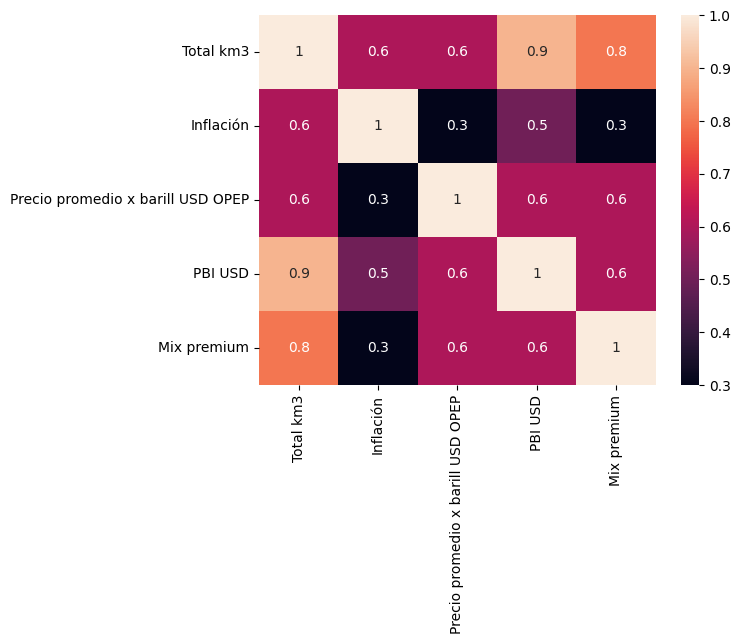

In [ ]:
matriz_correlacion= datos_nafta_premium.corr().round(1)
sns.heatmap(data=matriz_correlacion, annot=True)
plt.show()

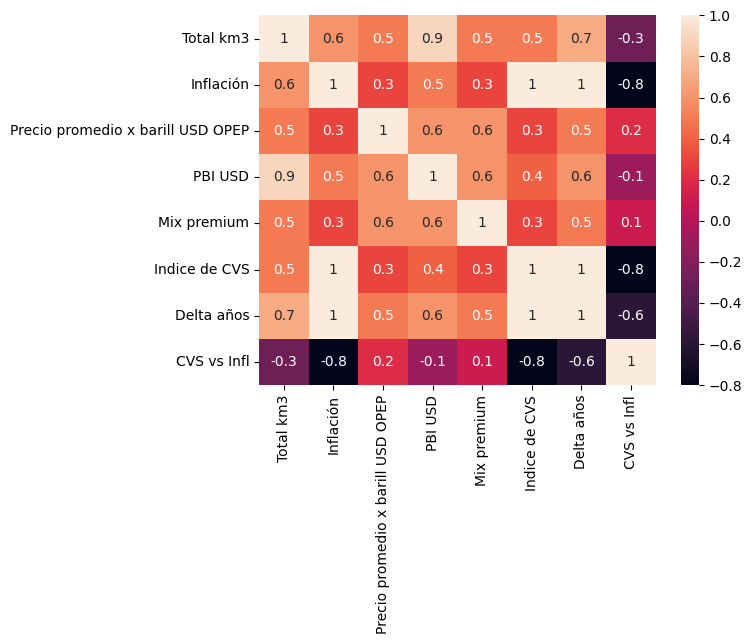

In [ ]:
matriz_correlacion= datos_mix.corr().round(1)
sns.heatmap(data=matriz_correlacion, annot=True)
plt.show()

In [ ]:
def forward_selection(data, target, significancia):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significancia):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
x=datos_mix.drop('Mix premium',axis=1)
y=datos_mix['Mix premium']

In [ ]:
significancia = 0.2
seleccionadas = forward_selection(x,y,significancia)

In [ ]:
print(f"\nCon nivel {significancia} se han seleccionado {len(seleccionadas)} características: ",seleccionadas, '\n')


Con nivel 0.2 se han seleccionado 2 características:  ['Precio promedio x barill USD OPEP', 'Total km3'] 



##MIX

In [ ]:
# 1 )Preparación de datos
X = datos_mix[['Total km3','CVS vs Infl']]
y= datos_mix['Mix premium']
# 2) Separacion en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)
y_pred

array([20.8526056 , 25.69405308, 20.2050395 , 27.22983217, 23.18695372])

In [ ]:
y_test

Año
2007    31.37
2015    27.57
1999     1.71
2017    31.13
2010    20.23
Name: Mix premium, dtype: float64

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
print(df)

      Actual  Predicted      Sesgo   Error_porc
Año                                            
2007   31.37  20.852606  10.517394    33.526919
2015   27.57  25.694053   1.875947     6.804305
1999    1.71  20.205040 -18.495040 -1081.581257
2017   31.13  27.229832   3.900168    12.528647
2010   20.23  23.186954  -2.956954   -14.616677


In [ ]:
# Coeficientes de la regresión múltiple
coeficientes = regressor.coef_
print("Coeficientes:", coeficientes)

Coeficientes: [1.71965299e-03 8.89737238e+00]


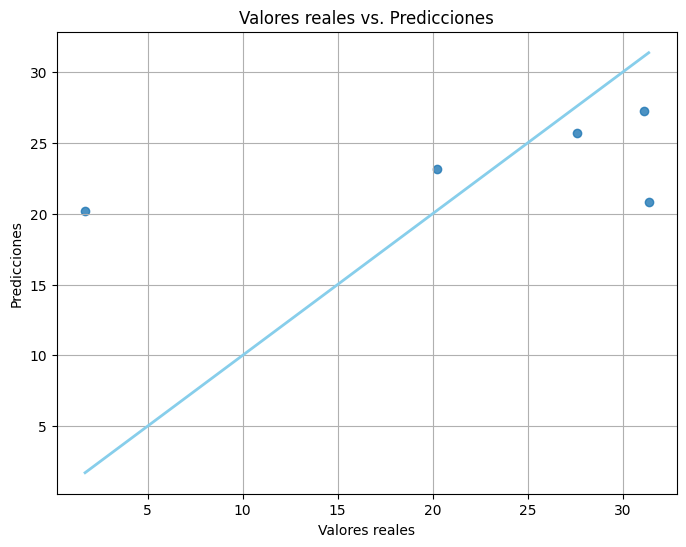

In [ ]:
#Gráfico comparativo
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.title('Valores reales vs. Predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.grid(True)

# linea de tendencia
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='skyblue', linewidth=2)
plt.show()


In [ ]:
print('Valor de la intersección')
print(regressor.intercept_.round(2))
print('Precisión de mi modelo')
print(regressor.score(X_test,y_test).round(3))

Valor de la intersección
11.08
Precisión de mi modelo
0.221


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", round(mae, 2))

MAE: 7.71


El MSE es el promedio de los cuadrados de los errores entre las predicciones del modelo y los valores reales del conjunto de datos

##Hipotesis para el 2024:

En un primer lugar se realizará un analisis teniendo en cuenta solamente la cantidad de km3 obtendos en el análisis previo, y el delta entre el CVS y la inflacion.

En segundo lugar, se tendrá: total km3, el delta entre CVS e inflación y se sumará el precio del barril


###Predicción MIX PREMIUM



*   Total km3= 9533,98
*   CVS vs Inflación: Considerando que la variación del 2023 fue del -59%, se considera un escenario aun más pesimista, llevandolo a un -65%






In [ ]:
# Nueva fila de datos para las hipótesis del año 2024
nueva_data = pd.DataFrame({'Total km3' : [9533.98],
                           'CVS vs Infl' : [-0.65]})


In [ ]:
X = datos_mix[['Total km3','CVS vs Infl']]
y= datos_mix['Mix premium']

In [ ]:
# Realiza la predicción para la nueva fila de datos
prediccion_MixPremium = regressor.predict(nueva_data)

print("Predicción MixPremium 2024:", prediccion_MixPremium)

Predicción MixPremium 2024: [21.69190753]


### Random Forest

Se utiliza otro tipo de algoritmo para realizar el análisis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crea una instancia del modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Entrena el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Coeficiente de Determinación (R²): 0.62


In [ ]:
#predicción para la nueva fila de datos
prediccion_total_mixpremium= predicciones = rf_model.predict(nueva_data)

print("Predicción Total de MIX PREMIUM 2024:", prediccion_total_mixpremium)

Predicción Total de MIX PREMIUM 2024: [25.5396]


***Busco si mejorando los hiperparametros se obtiene un r2 mejor. ***

In [ ]:
#Hypertuning utilizando grid search

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [ ]:
#parámetros de búsqueda
params = {
    'n_estimators' : [50,100,200],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[4,5]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  #
                                  cv = 5,
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [ ]:
%%time
#Entrenamos el modelo
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 807 ms, sys: 138 ms, total: 945 ms
Wall time: 40.1 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [4, 5], 'max_features': [2, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
# mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=50)

In [ ]:
grid_random_forest.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 5,
 'n_estimators': 50}

In [ ]:
random_forest_nuevo = RandomForestRegressor(criterion='squared_error',max_depth=5, max_features= 5, n_estimators=50) #Instanciamos el modelo

In [ ]:
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=50)

In [ ]:
#Predicción
y_pred_train=random_forest_nuevo.predict(X_train)
y_pred_test = random_forest_nuevo.predict(X_test)

In [ ]:
#R^2
r2_test = r2_score(y_test, y_pred_test)
print(f'R^2 en el conjunto de prueba: {r2_test:.3f}')

R^2 en el conjunto de prueba: 0.595


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", round(mae, 2))

MAE: 5.76


In [ ]:
# predicción para la nueva fila de datos
prediccion_Mix= predicciones = random_forest_nuevo.predict(nueva_data)

print("Predicción Mix para 2024:", prediccion_Mix)

Predicción Mix para 2024: [26.171]


##Variables extra
Agregamos más variables al análisis para ver si obtenemos otro tipo de resultados


*   Precio del barril USD: 83
*   CVS vs Inflación: -0,65



In [ ]:
# Nueva fila de datos para las hipótesis del año 2024
nueva_data1 = pd.DataFrame({'Total km3' : [9533.98],
                           'CVS vs Infl' : [-0.65],
                           'Precio promedio x barill USD OPEP':[83]})

In [ ]:
# 1 )Preparación de datos
X = datos_mix[['Total km3','CVS vs Infl','Precio promedio x barill USD OPEP']]
y= datos_mix['Mix premium']
# 2) Separacion en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)
y_pred

array([21.42541682, 23.74471882, 18.11254067, 24.92958374, 23.47979705])

In [ ]:
y_test

Año
2007    31.37
2015    27.57
1999     1.71
2017    31.13
2010    20.23
Name: Mix premium, dtype: float64

In [ ]:
print('Precisión de mi modelo')
print(regressor.score(X_test,y_test).round(4))

Precisión de mi modelo
0.2996


Al ser muy bajo, buscamos otro algortimo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crea una instancia del modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Entrena el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Coeficiente de Determinación (R²): 0.67


In [ ]:
#predicción para la nueva fila de datos
prediccion_total_mixpremium= predicciones = rf_model.predict(nueva_data1)

print("Predicción Total de MIX PREMIUM 2024:", prediccion_total_mixpremium)

Predicción Total de MIX PREMIUM 2024: [26.0248]
